In [ ]:
# Did Learn Regression analysis o all the stocks given in the ticker list and invested in the ones witha  good EPS prediction for the next day with a low MSE 
#invested in 1) AVGO 2) WMT 

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [7]:
#importing data
ticker= ['NVDA','AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'TSLA', 'BRK-B', 'AVGO', 'WMT', 'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG', 'NFLX' ]
index=8

#ticker = target_tickers

stock_data= yf.download(ticker[index], start="2023-11-1", end="2024-11-22")

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AVGO,AVGO,AVGO,AVGO,AVGO,AVGO
Date,,,,,,
2023-11-01,83.999672,85.293999,85.383003,83.556999,84.199997,18684000
2023-11-02,85.807800,87.129997,88.050003,86.000000,86.199997,18759000
2023-11-03,86.928535,88.267998,88.750000,87.106003,87.750000,18041000
2023-11-06,86.746346,88.083000,88.588997,87.121002,88.155998,12870000
2023-11-07,88.419548,89.781998,90.177002,87.615997,88.232002,19365000
...,...,...,...,...,...,...
2024-11-15,164.839996,164.839996,169.139999,163.429993,168.470001,20836200
2024-11-18,165.669998,165.669998,166.350006,162.220001,165.660004,17870300


In [9]:
ticker_id=[]
ND_price=[]
PD_price= []
EPS= []
RMSE= []

for i in ticker:
    ticker_id.append(i)
    stock_data= yf.download(i, start="2024-10-6", end="2024-11-20")
    closing= stock_data['Close'][i].tolist()

    working_df= pd.DataFrame(columns=['Close'])
    working_df['Close']= closing
    # Create lag features
    working_df['Lag_1'] = working_df['Close'].shift(1)  # Previous day's close
    working_df['Lag_2'] = working_df['Close'].shift(2)  # 2 days ago
    working_df['Lag_3'] = working_df['Close'].shift(3)  # 3 days ago

    # Drop rows with NaN values caused by the lag
    working_df = working_df.dropna()

    X = working_df[['Lag_1', 'Lag_2', 'Lag_3']]  # Features
    y = working_df['Close']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("Root Mean Squared Error:", rmse)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    RMSE.append(rmse)
    
    # Prepare the last row of lagged features
    last_row = working_df.iloc[-1][['Lag_1', 'Lag_2', 'Lag_3']].values.reshape(1, -1)

    # Predict the next day's closing price
    next_day_price = model.predict(last_row)
    ND_price.append(next_day_price[0])
    #print("Predicted Next Day Price:", next_day_price[0])
    EPS.append(next_day_price - closing[-1])
    PD_price.append(closing[-1])




[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 4.176227000750958
Root Mean Squared Error: 2.739078200735343


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 4.56420621617119
Root Mean Squared Error: 5.695085548340033


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 3.4826734217300235
Root Mean Squared Error: 10.500131251963642
Root Mean Squared Error: 21.053203521744358


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 4.235287832280555
Root Mean Squared Error: 4.036958759427008


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 1.1202423995977233


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 22.29960701751275


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 3.90520019436994
Root Mean Squared Error: 2.211882710509331


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 5.391155446336808
Root Mean Squared Error: 1.0411270256089975


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 4.4093340423604
Root Mean Squared Error: 3.9878627364739394


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/De

Root Mean Squared Error: 11.469953201546613
Root Mean Squared Error: 3.884592650974124


[*********************100%***********************]  1 of 1 completed
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
[*********************100%***********************]  1 of 1 completed

Root Mean Squared Error: 1.414132274485935
Root Mean Squared Error: 21.26697161953731



/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pranavsharma/Desktop/VS/StockMarketAnanlysis/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
ticker_id

['NVDA',
 'AAPL',
 'MSFT',
 'AMZN',
 'GOOG',
 'META',
 'TSLA',
 'BRK-B',
 'AVGO',
 'WMT',
 'LLY',
 'JPM',
 'V',
 'UNH',
 'XOM',
 'ORCL',
 'MA',
 'COST',
 'HD',
 'PG',
 'NFLX']

In [11]:
analysis_df= pd.DataFrame()
analysis_df['ticker_id']= ticker_id
analysis_df['ND_Predictions']=ND_price
analysis_df['PD_price']=PD_price
analysis_df['EPS']= EPS
analysis_df['RMSE']= RMSE

In [12]:
analysis_df

,ticker_id,ND_Predictions,PD_price,EPS,RMSE
0,NVDA,139.070303,147.009995,[-7.939691157716624],4.176227
1,AAPL,229.943609,228.279999,[1.663610121379719],2.739078
2,MSFT,416.998601,417.790009,[-0.7914071876763273],4.564206
3,AMZN,204.630460,204.610001,[0.020459513114104766],5.695086
4,GOOG,179.696753,179.580002,[0.11675097935864187],3.482673
5,META,565.862931,561.090027,[4.7729037529039715],10.500131
6,TSLA,354.031549,346.000000,[8.031549114468078],21.053204
7,BRK-B,467.107251,468.859985,[-1.7527348458533538],4.235288
8,AVGO,170.624378,165.350006,[5.274371747801666],4.036959
9,WMT,84.208978,86.599998,[-2.3910200843735367],1.120242


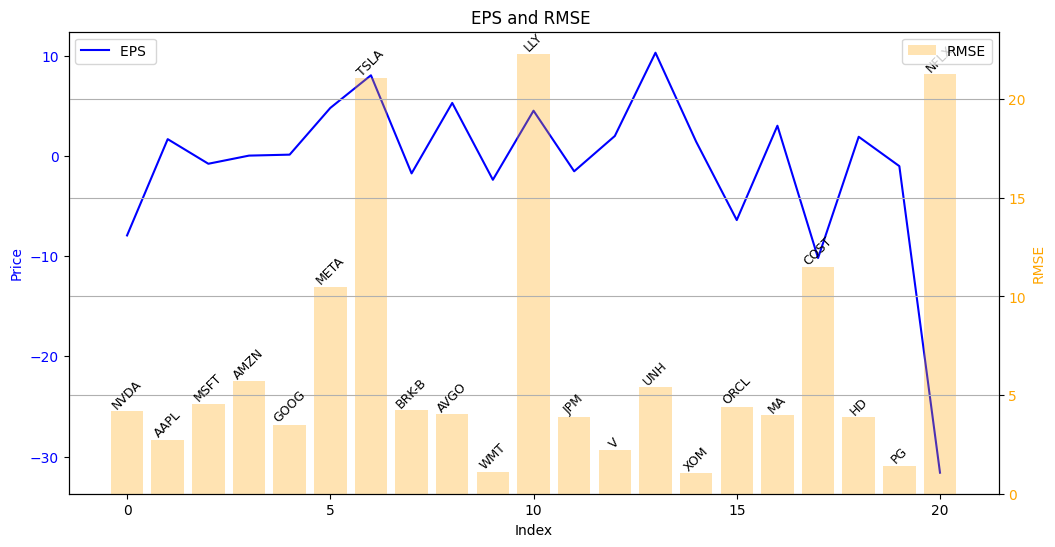

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for prices
# ax1.plot(analysis_df.index, analysis_df['PD_price'], label='Actual Price', color='blue')
# ax1.plot(analysis_df.index, analysis_df['ND_Predictions'], label='Predicted Price', color='green', linestyle='--')
ax1.plot(analysis_df.index, analysis_df['EPS'], label='EPS ', color='blue')
ax1.set_xlabel('Index')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Bar plot for RMSE
ax2 = ax1.twinx()
bars = ax2.bar(analysis_df.index, analysis_df['RMSE'], alpha=0.3, label='RMSE', color='orange')
ax2.set_ylabel('RMSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Add TickerID labels on top of bars
for bar, ticker_id in zip(bars, analysis_df['ticker_id']):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),                  # Y-coordinate (top of the bar)
        ticker_id,                         # TickerID to display
        ha='center', va='bottom', fontsize=9, rotation=45, color='black'
    )

plt.title('EPS and RMSE ')
plt.grid()
plt.show()

